## Comparison of our own software and standard software (AUTOPIA)
- AUTOPIA has its own test pattern for MTF testing, but we don't (or it expensive)
- However, we know that each detector has a performance for modulation.
- We then convert the value (graph) from AUTOPIA for each detector.
- We obtain a pseudo value if tested with the MTF bar (that we have).
- Then, we identify the error between us and them.
- To obtain the closest value to theirs.
- We only have three rooms (detectors) available for use because otherwise, the modulation of the 2nd exceeds 100% due to processing.
- In comparison, we skip the first LP because in AUTOPIA it is not at 100% (lower than our value). Anyway, if we were to add it up, it would exceed 100%.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [37]:
MTFLP = np.array([0, 1, 1.11, 1.23, 1.37, 1.52, 1.69, 1.88, 2.09, 2.32, 2.58, 2.87, 3.19, 3.54, 3.93, 4.37, 4.86])
AUTOPIALP = np.array([0.5, 0.56, 0.63, 0.71, 0.8, 0.9, 1, 1.12, 1.25, 1.4, 1.6, 1.8, 2, 2.24, 2.5, 2.8, 3.15, 3.355, 4, 4.5, 5])
columns = ["DX1avg", "DX2avg", "SW2avg"]
mtf_df = pd.read_excel("BAR_eval/MTF_data.xlsx")
auto_df = pd.read_excel("BAR_eval/AUTOPIA_data.xlsx")

In [38]:
mtf_data = []
auto_data = []
for col in columns :
    mtf_data.append(mtf_df[f"{col}"].to_numpy())
    auto_data.append(auto_df[f"{col}"].to_numpy())

- We then convert the value (graph) from AUTOPIA for each detector.
- We obtain a pseudo value if tested with the MTF bar (that we have).

In [161]:
# creating graph from AUTOPIA for each detector
def polynomial(y) :
    """
    Return polynomial b0, b1, b2 from AUTOPIA mtf values 
    y = b0 + b1x + b2x^2 ; y=mtf, x=lp
    """
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(AUTOPIALP.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    return model.intercept_, model.coef_[1:]

def predict(weights, x) :
    return weights[0] + weights[1][0]*x + weights[1][1]*(x**2)

def plot_result(idx) :
    w = polynomial(auto_data[idx])
    psudo1 = predict(w, MTFLP)

    plt.figure(figsize=(40, 8))
    plt.suptitle(f"{columns[idx]}", fontsize=18)
    plt.subplot(1, 3, 1)
    plt.title("Us sotfware")
    plt.plot(MTFLP, mtf_data[idx], label='MTF Data')
    plt.scatter(MTFLP, mtf_data[idx])
    plt.xticks(MTFLP, rotation=90)
    plt.grid(True)
    plt.xlabel('MTF LP')
    plt.ylabel('MTF Value')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.title("AUTOPIA")
    plt.plot(AUTOPIALP, auto_data[idx], label='AUTOPIA Data', c="red")
    plt.scatter(AUTOPIALP, auto_data[idx], c="red")
    plt.plot(MTFLP, psudo1, label='Pseudo MTF', linestyle="--", c="k")
    plt.xlabel('AUTOPIA LP')
    plt.ylabel('AUTOPIA Value')
    plt.xticks(AUTOPIALP, rotation=90)
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.title("Pseudo MTF from AUTOPIA")
    plt.plot(MTFLP, psudo1, label='Pseudo MTF', linestyle="--", c="k")
    plt.plot(MTFLP, mtf_data[idx], label='MTF Data')
    plt.xlabel('MTF LP')
    plt.ylabel('MTF Value')
    plt.xticks(MTFLP, rotation=90)
    plt.grid(True)
    plt.legend()
    plt.show()

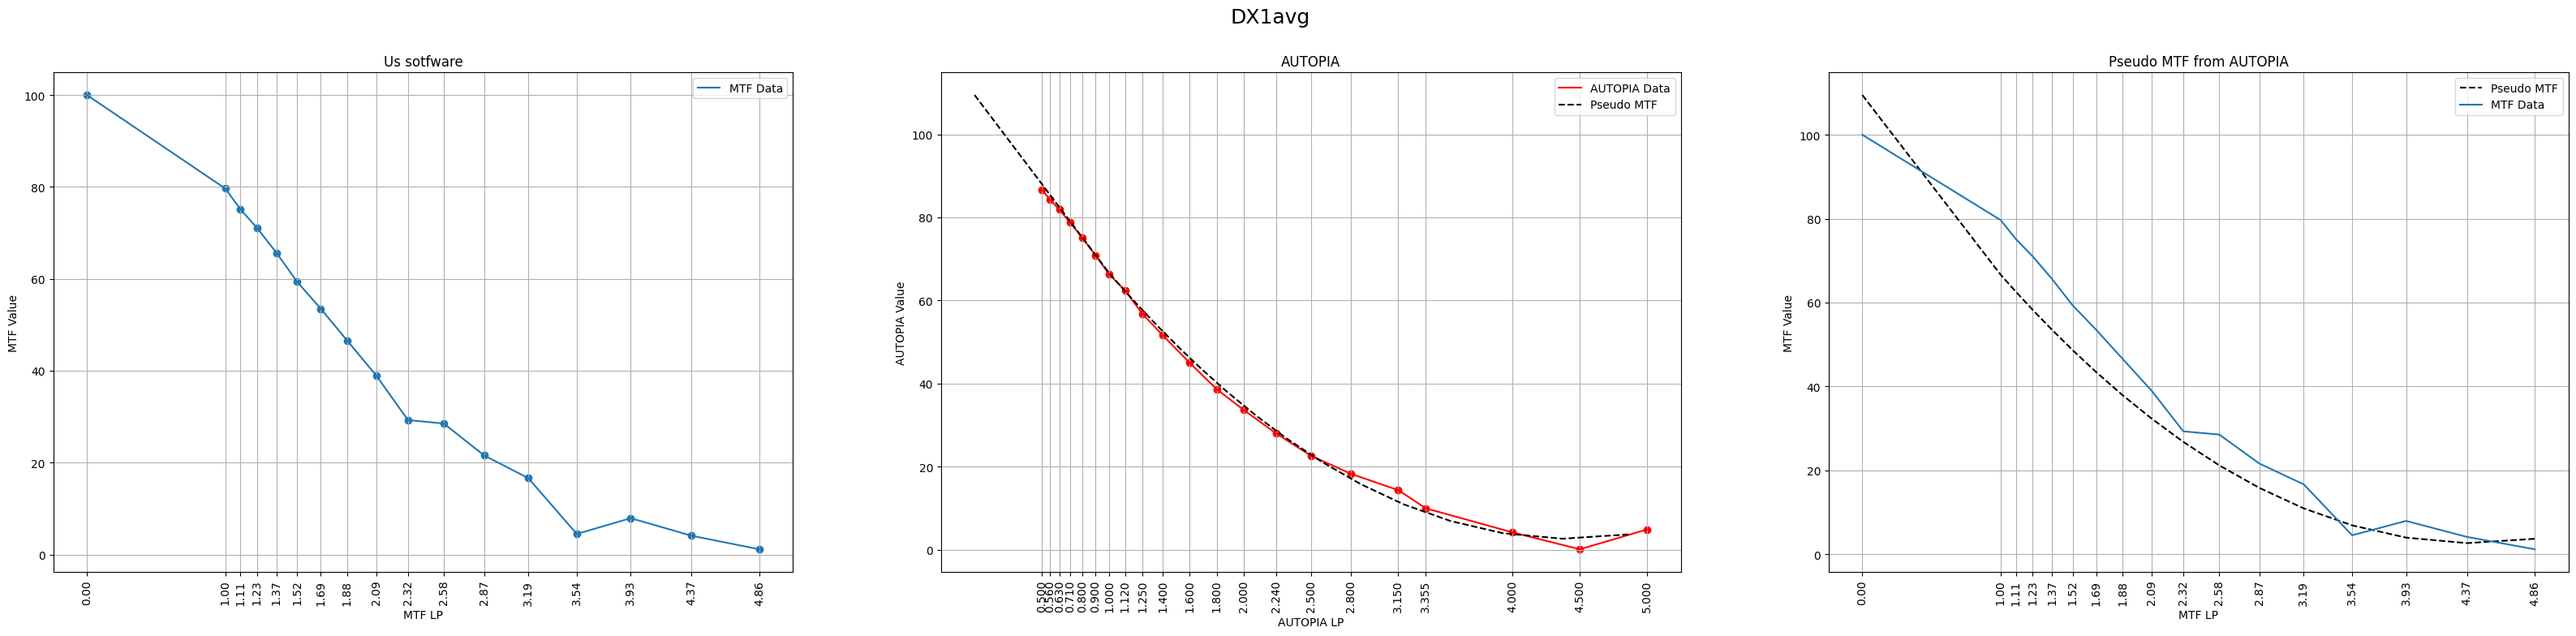

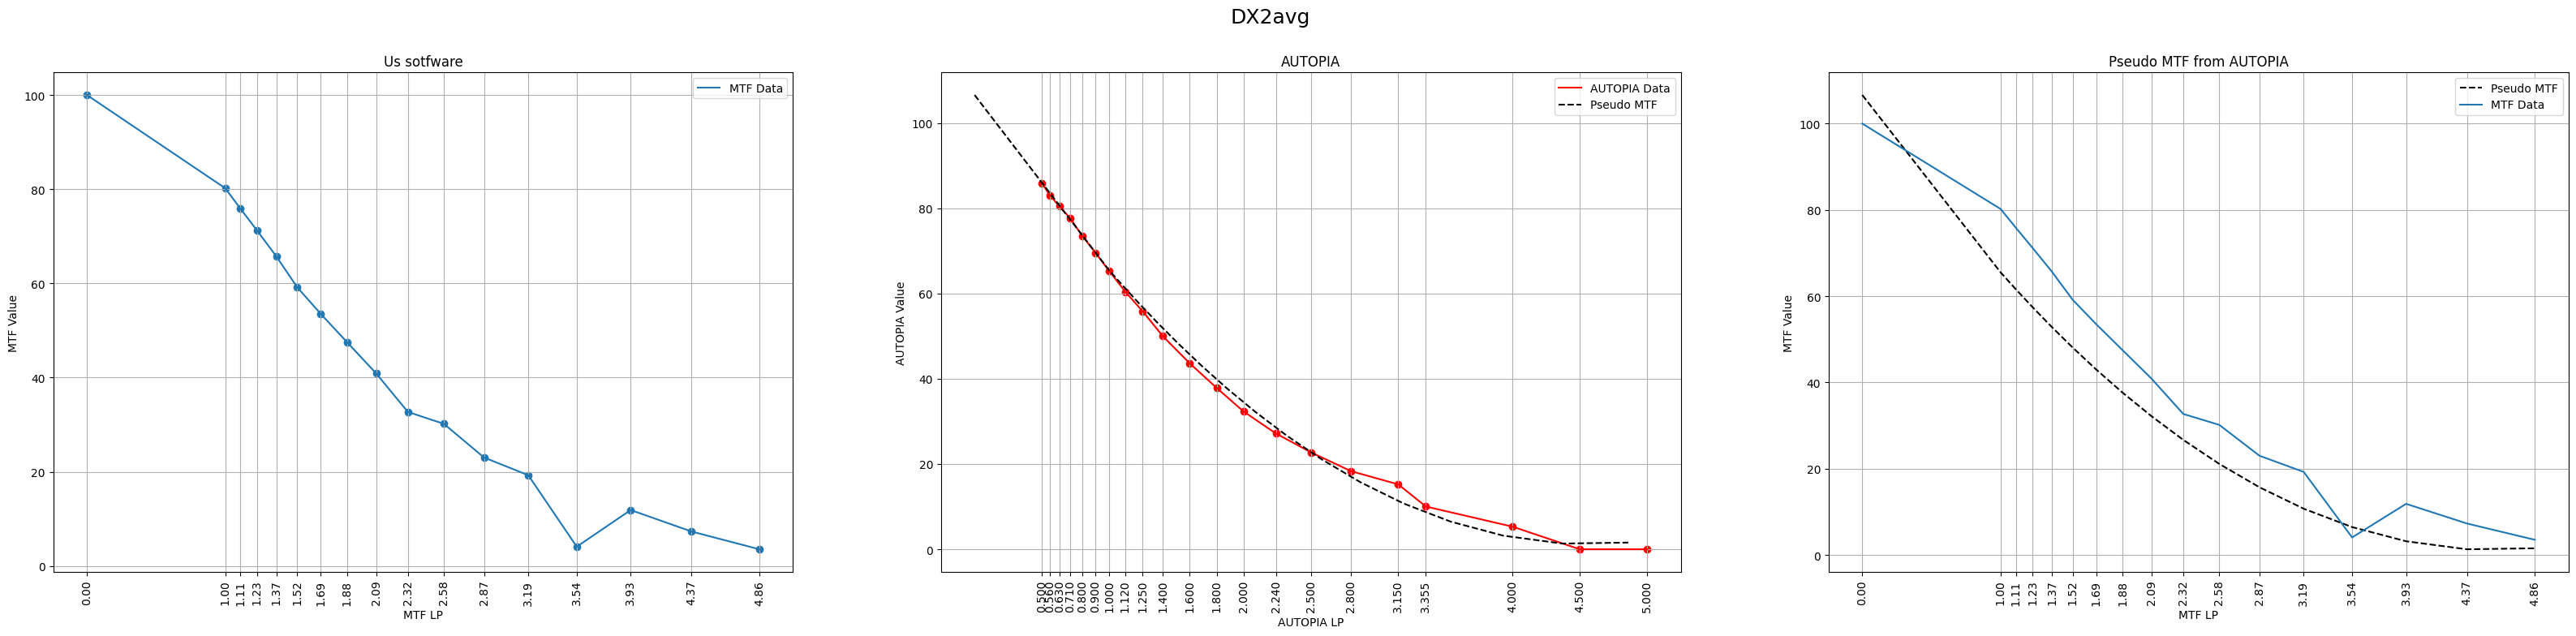

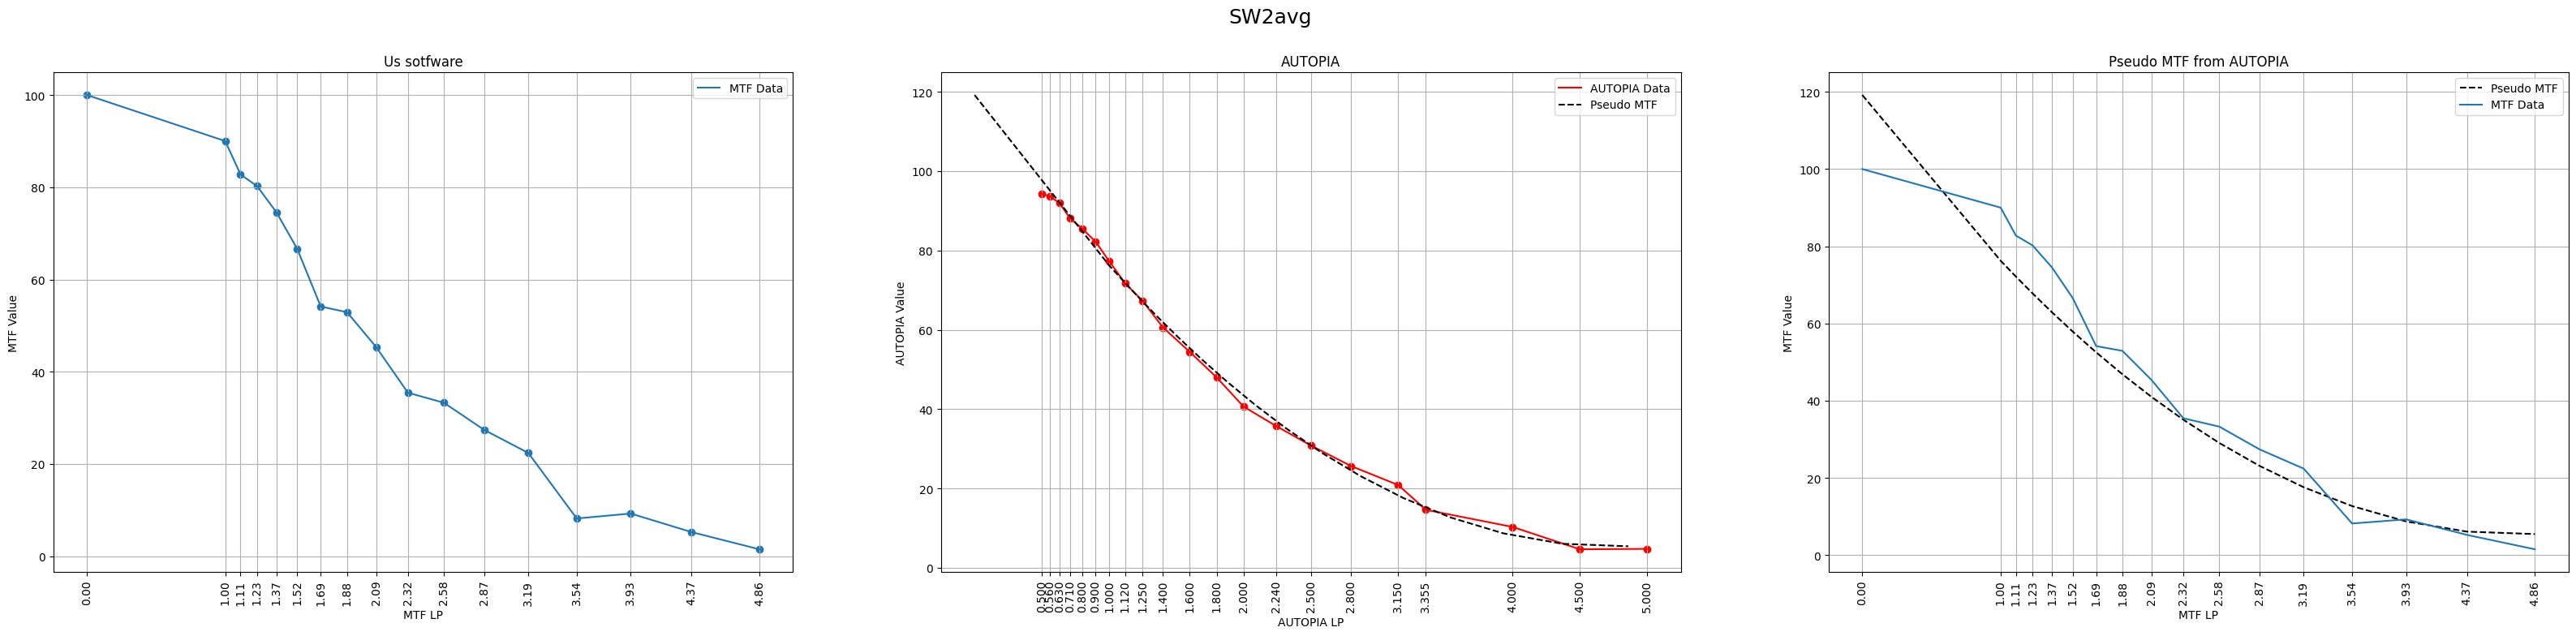

In [162]:
for idx in range(3) :
    plot_result(idx)